# Day 1 Eindopdracht “Statistics for Data Science”

Voor deze eindopdracht zijn er twee mogelijkheden. Hieronder volgt ten eerste de
beschrijving van een opdracht gebaseerd op een dataset over universiteiten in de Verenigde
Staten. Het is ook mogelijk om de eindopdracht te baseren op een eigen (bedrijfs)dataset.
Aan het einde van dit document volgt meer informatie hierover.

Voor beide opdrachten geldt dat de resultaten in drie delen ingeleverd moeten worden,
telkens samengevat in een bondig rapport. In dit rapport moet voor elke deelanalyse dui-
delijk zijn wat het doel van de berekening is, wat de uitkomst is en vooral wat de conclusie
is.

Zorg ervoor dat er voldoende details gegeven zijn, bijvoorbeeld bij het uitvoeren van
een statistische toets is het van belang om:
1. de keuze van de toets duidelijk te motiveren;
2. de nul- en alternatieve hypothese te beschrijven;
3. de p-waarde te rapporteren;
4. de uiteindelijke conclusie te rapporteren in termen van de toepassing (dus niet alleen
“de nul-hypothese wordt verworpen”, maar ook wat dit dan betekent).


Voor elk deel van de opdracht moet een rapport in pdf formaat ingeleverd worden, sa-
men met de volledige Python (of R) code in een apart bestand. Het inleveren verloopt via
Canvas (zie onder “Assignments”). Het verwerken van de resultaten met behulp van bij-
voorbeeld een Jupyter Notebook of R-Markdown is prima, maar probeer onnodige output
te vermijden en lever ook altijd een pdf versie in.
De deadlines zijn als volgt:
Deel 1: zondag, 28 september (voor het einde van de dag);
Deel 2: zondag, 12 oktober (voor het einde van de dag);
Deel 3: zondag, 26 oktober (voor het einde van de dag).



## 1 Opdracht obv. universiteitsdata
Het databestand college statistics.csv bevat informatie over 777 universiteiten en
colleges in de Verenigde Staten in ´e´en specifiek jaar.

De variabelen in deze dataset zijn:

- Privé (Private): Indicator voor publiek/persoonlijk
- Aanvragen (Apps): Aantal ontvangen aanvragen
- Acceptatie (Accept): Aantal toegelaten aanvragers
- Inschrijving (Enroll): Aantal nieuwe ingeschreven studenten
- Top10perc: Percentage nieuwe studenten die in de top 10% van hun middelbare schoolklasse zaten
- Top25perc: Percentage nieuwe studenten die in de top 25% van hun middelbare schoolklasse zaten
- F.Undergrad: Aantal voltijd bachelorstudenten
- P.Undergrad: Aantal deeltijd bachelorstudenten
- Outstate: Collegegeld voor studenten van buiten de staat
- Kamer en Board (Room.Board): Kosten voor kamer en maaltijden
- Boeken (Books): Geschatte kosten voor boeken
- Persoonlijk (Personal): Geschatte persoonlijke uitgaven
- PhD: Percentage faculteit met een Ph.D.
- Terminale graad (Terminal): Percentage faculteit met een terminale graad
- S.F.Ratio: Studenten/faculteit ratio
- Perc.alumni: Percentage alumni die doneren
- Uitgaven (Expend): Onderwijsexpenditures per student
- Afstudeerpercentage (Grad.Rate): Afstudeerpercentage

In deze opdracht voer je een gedetailleerde statistische analyse uit op deze dataset.
Hieronder vind je een lijst van stappen die uitgevoerd moeten worden.

# Deel 1

1. Lees de data in als dataframe.
inlezen csv-file

In [4]:
import sys, importlib.util, pprint
print("PYTHON:", sys.executable)
print("VERSIE:", sys.version)
pprint.pprint(sys.path[:3])
print("SEABORN SPEC:", importlib.util.find_spec("seaborn"))

PYTHON: /usr/local/bin/python3
VERSIE: 3.13.7 (v3.13.7:bcee1c32211, Aug 14 2025, 19:10:51) [Clang 16.0.0 (clang-1600.0.26.6)]
['/Library/Frameworks/Python.framework/Versions/3.13/lib/python313.zip',
 '/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13',
 '/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/lib-dynload']
SEABORN SPEC: ModuleSpec(name='seaborn', loader=<_frozen_importlib_external.SourceFileLoader object at 0x1060f69f0>, origin='/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/__init__.py', submodule_search_locations=['/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn'])


In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
DATA_PATH = "/Users/adilvural/Documents/GitHub/myPython/Opdracht_StatisticsforDataScience/college_statistics.csv"
FIG_DIR   = "/Users/adilvural/Documents/GitHub/myPython/Opdracht_StatisticsforDataScience/college_statistics"
#os.makedirs(FIG_DIR, exist_ok=True)

In [16]:
df = pd.read_csv(DATA_PATH, sep=",")
df.columns = [c.replace(".", "_") for c in df.columns]

#print (df.info())
#Deze functie geeft een samenvatting van het DataFrame, inclusief het aantal niet-lege (non-null) waarden per kolom, het datatype van elke kolom en de geheugengrootte. 
#Het is handig om een overzicht te krijgen van de structuur van de data en om te controleren op ontbrekende waarden.

#print (df.head())
#Dit toont de eerste n rijen van het DataFrame (standaard zijn het de eerste 5 rijen als je geen argument opgeeft). 
#Het is nuttig om snel een blik te werpen op een subset van de gegevens en om te controleren of de data correct is ingelezen.


#print (df.describe())
#Deze functie geeft een statistische samenvatting van de numerieke kolommen in het DataFrame. 
#Het omvat statistieken zoals het aantal waarden, het gemiddelde, de standaardafwijking, de minimum- en maximumwaarden, en de kwartielen. 
#Dit is handig om een idee te krijgen van de distributie van de numerieke gegevens.

#print (df.columns)
#Dit geeft een lijst van de kolomnamen in het DataFrame terug. Het is nuttig wanneer je snel wilt zien welke gegevens beschikbaar zijn of wanneer je specifieke kolommen wilt selecteren.


print (df.shape) 
#Dit geeft een tuple terug met de afmetingen van het DataFrame in de vorm (aantal_rijen, aantal_kolommen). Het is handig om snel te controleren hoeveel gegevens er in het DataFrame zijn.

(777, 19)


2. Voer beschrijvende statistiek uit door middel van het maken van een aantal grafieken. Creeer geschikte grafieken om de volgende vragen te beantwoorden:
- (a) Zijn private universiteiten overwegend kleiner of groter dan publieke universiteiten? Je mag zelf een definitie voor groot/klein definieeren.

In [ ]:
# Voeg een kolom 'Size' toe om de gemiddelde grootte te definiëren
# aan de hand van Inschrijving (Enroll): Aantal nieuwe ingeschreven studenten kunnen we bepalen of een universiteit groot of klein is!

print(df.head(10))  # Print de eerste 10 rijen 

df['Size'] = df['Enroll'].apply(lambda x: 'Groot' if x > df['Enroll'].median() else 'Klein')

#print (df['Size'].value_counts())
result = df[['Size', 'Enroll']]
print(result)


#conclusie:
#Het aantal ingeschreven studenten (enroll) is een directe indicator van de grootte van een universiteit. 
#Het weerspiegelt niet alleen de capaciteit van de instelling, maar ook de populariteit en aantrekkingskracht ervan. 
#Universiteiten met een hoger aantal ingeschreven studenten hebben vaak meer middelen, programma's en voorzieningen, wat van belang is bij het vergelijken van instellingen.
#Door de mediaan te gebruiken als drempelwaarde, kunnen we universiteiten in twee categorieën verdelen:
#Groot: Universiteiten met een inschrijving boven de mediaan.
#Klein: Universiteiten met een inschrijving gelijk aan of onder de mediaan.
#Deze benadering zorgt voor een evenwichtige verdeling van universiteiten in beide categorieën, waardoor we een beter inzicht krijgen in de algemene trends en patronen binnen de dataset.

                     Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   
5             Albertson College     Yes   587     479     158         38   
6       Albertus Magnus College     Yes   353     340     103         17   
7                Albion College     Yes  1899    1720     489         37   
8              Albright College     Yes  1038     839     227         30   
9     Alderson-Broaddus College     Yes   582     498     172         21   

   Top25perc  F_Undergrad  P_Undergrad  Outstate  Room_Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1

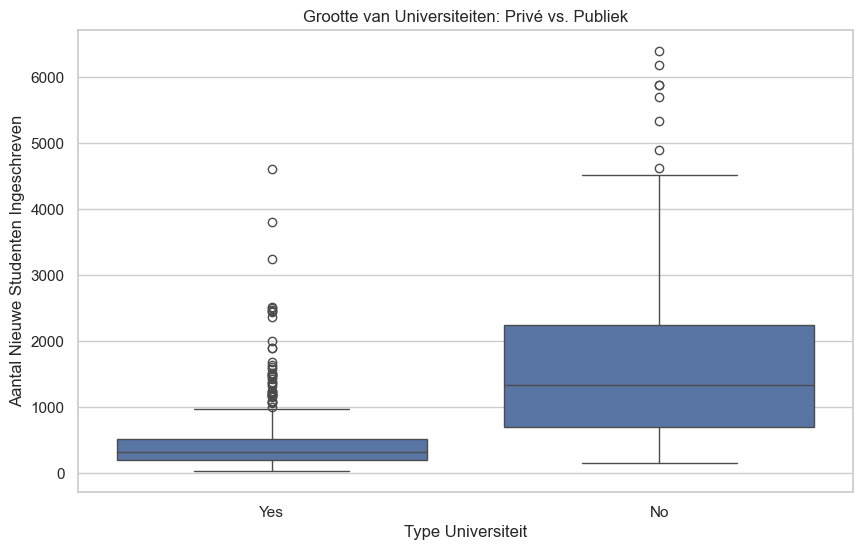

In [30]:
# Maak een boxplot om de grootte van private versus publieke universiteiten te vergelijken
plt.figure(figsize=(10, 6))
sns.boxplot(x='Private', y='Enroll', data=df)
plt.title('Grootte van Universiteiten: Privé vs. Publiek')
plt.ylabel('Aantal Nieuwe Studenten Ingeschreven')
plt.xlabel('Type Universiteit')
plt.show()

2. Voer beschrijvende statistiek uit door middel van het maken van een aantal grafieken. Creeer geschikte grafieken om de volgende vragen te beantwoorden:
- (b) Zijn de meer selectieve universiteiten ook overwegend duurder dan minder selectieve universiteiten? (Je mag zelf bepalen welke kosten je wel/niet mee neemt.)

In [ ]:
sum(age)

110.2

2. Voer beschrijvende statistiek uit door middel van het maken van een aantal grafieken. Creeer geschikte grafieken om de volgende vragen te beantwoorden:
- (c) Bedenk zelf een extra vraag en cre¨ eer een geschikte figuur om deze vraag meete beantwoorden.

In [ ]:
sum(age) / len(age)

22.04

Store the mean age in a variable.

In [ ]:
mean_age = sum(age) / len(age)

Print the mean age.

In [ ]:
mean_age

22.04

So far, every cell contained just one line of code. Code cells can hold as many lines as you want. 

In [ ]:
# Print the length of the list
print("There are", len(age), "elements in the age list")

# Store the mean age in a variable
mean_age = sum(age) / len(age)

# Print the mean_age
print("The mean age of the", len(age), "students is:", mean_age)

There are 5 elements in the age list
The mean age of the 5 students is: 22.04


Use the ```help()``` function to get more info on what a function does and which parameters it expects.

In [ ]:
help(print)

Help on built-in function print in module builtins:

print(*args, sep=' ', end='\n', file=None, flush=False)
    Prints the values to a stream, or to sys.stdout by default.

    sep
      string inserted between values, default a space.
    end
      string appended after the last value, default a newline.
    file
      a file-like object (stream); defaults to the current sys.stdout.
    flush
      whether to forcibly flush the stream.

